<a href="https://colab.research.google.com/github/jiteshpabla/PyTorch_tutorials/blob/master/UdacityPyTorch_3_trainingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!





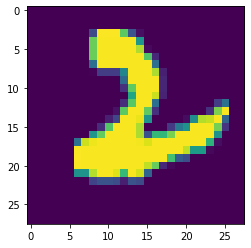

In [24]:
#get data
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())
images = images.view(images.shape[0], -1) # (64, 784)

cross entropy

In [41]:
import matplotlib.pyplot as plt

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

#single model definition
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

#define loss
criterion = nn.CrossEntropyLoss()

#forward pass to get logits
logits = model(images)
print(logits[:5])
# what are logits?
# https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow#:~:text=Logits%20is%20an%20overloaded%20term,In%20ML%2C%20it%20can%20be

#get the loss between the forward pass logits and the actual labels
loss = criterion(logits, labels)

print(loss)

tensor([[0.1067, 0.0830, 0.0946, 0.0916, 0.1270, 0.1182, 0.0906, 0.0833, 0.1037,
         0.1013],
        [0.1084, 0.0926, 0.0874, 0.0899, 0.1275, 0.1090, 0.0966, 0.0842, 0.0968,
         0.1075],
        [0.1127, 0.0765, 0.0922, 0.0948, 0.1352, 0.1066, 0.0963, 0.0840, 0.0962,
         0.1056],
        [0.0967, 0.0830, 0.0966, 0.0965, 0.1301, 0.1074, 0.1039, 0.0844, 0.1005,
         0.1009],
        [0.1085, 0.0889, 0.0865, 0.0871, 0.1258, 0.1095, 0.0978, 0.0909, 0.0997,
         0.1054]], grad_fn=<SliceBackward>)
tensor(2.3049, grad_fn=<NllLossBackward>)


log softmax

In [42]:
#single model definition
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

#define loss
criterion = nn.NLLLoss()

#forward pass to get log_probability
log_probability = model(images)
print(log_probability[:5])

#get the loss between the forward pass log_probability and the actual labels
loss = criterion(log_probability, labels)
print(loss)

tensor([[-2.3978, -2.2668, -2.2496, -2.2795, -2.3871, -2.2754, -2.1622, -2.3229,
         -2.3293, -2.3796],
        [-2.3968, -2.2901, -2.3859, -2.3324, -2.3638, -2.2254, -2.1645, -2.2589,
         -2.2587, -2.3770],
        [-2.4571, -2.2464, -2.3318, -2.3581, -2.3743, -2.1824, -2.1573, -2.3290,
         -2.3560, -2.2718],
        [-2.3830, -2.2110, -2.3297, -2.3846, -2.3076, -2.3202, -2.0925, -2.2585,
         -2.4266, -2.3569],
        [-2.3891, -2.2118, -2.3926, -2.3536, -2.3145, -2.2775, -2.1452, -2.2306,
         -2.3359, -2.4103]], grad_fn=<SliceBackward>)
tensor(2.3173, grad_fn=<NllLossBackward>)
